In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers = sorted(['SPY'])

prices = yf.download(tickers, start="2022-01-01", end="2025-10-15", progress=False)['Close']

rets = prices.pct_change().dropna()

sigma = rets.std() * np.sqrt(252)

S0 = prices.iloc[-1]  # Precio spot
r = 0.0411 # Tasa libre de riesgo anual
T = 100 / 365  # Tiempo hasta el vencimiento en años
K = 680  # Precio de ejercicio
type = 'call'

C:\Users\samue\AppData\Local\Temp\ipykernel_7592\1908908447.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start="2022-01-01", end="2025-10-15", progress=False)['Close']


In [3]:
def valuacion_opciones_europeas(type, S0, K, r, T, sigma, sim):
    Z = np.random.normal(0,1,sim)
    St = [S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z) for Z in Z]

    if type == "call":
        payoff = np.maximum(np.array(St) - K, 0)
        
    else:  # put
        payoff = np.maximum(K - np.array(St), 0)

    price = np.exp(-r * T) * np.mean(payoff)

    return price

def valuacion_opciones_europeas_antitetica(type, S0, K, r, T, sigma, sim):
    
    Z = np.random.normal(0, 1, sim)
    Z_antit = -Z 
    
    St1 = [S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z) for Z in Z]
    St2 = [S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z) for Z in Z_antit]

    if type == "call":
        payoff1 = np.maximum(np.array(St1) - K, 0)
        payoff2 = np.maximum(np.array(St2) - K, 0)
    else:  # put
        payoff1 = np.maximum(K - np.array(St1), 0)
        payoff2 = np.maximum(K - np.array(St2), 0)
    
    payoff_medio = 0.5 * (payoff1 + payoff2)
    
    price = np.exp(-r * T) * np.mean(payoff_medio)
    
    return price

In [4]:
sim = 100000
Z = np.random.normal(0, 1, sim)   

In [5]:
# Monte Carlo estándar
ST_std = [S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z) for Z in Z]
payoff_std = np.maximum(np.array(ST_std) - K, 0)

call_std = np.exp(-r * T) * payoff_std  

In [6]:
# Monte Carlo antitéticas
Z_antithetic = -Z
ST_ant = [S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z) for Z in Z_antithetic]
payoff_ant = np.maximum(np.array(ST_ant) - K, 0)

call_ant = np.exp(-r * T) * 0.5 * (payoff_std + payoff_ant) 

In [7]:
# Cálculo acumulado para mostrar convergencia
precios_std = np.cumsum(call_std) / np.arange(1, sim + 1)   
precios_antit = np.cumsum(call_ant) / np.arange(1, sim + 1)

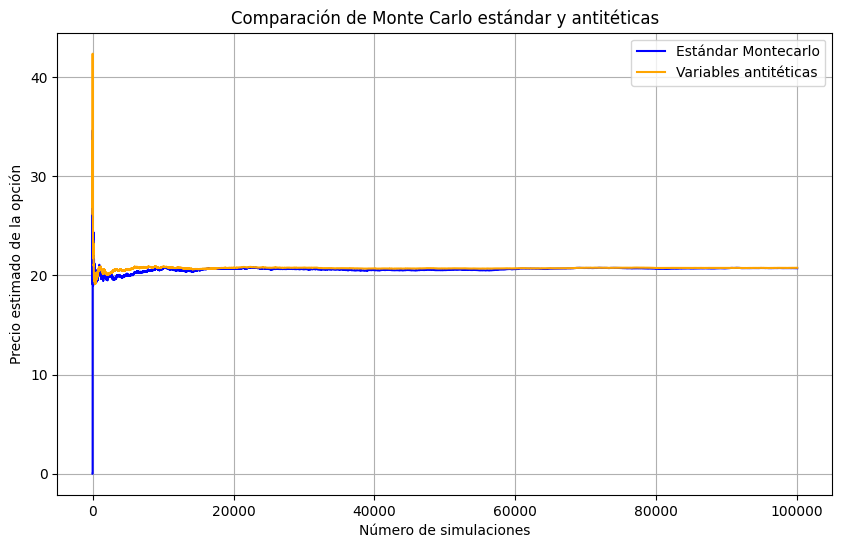

In [8]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, sim + 1), precios_std, label='Estándar Montecarlo', color='blue')
plt.plot(np.arange(1, sim + 1), precios_antit, label='Variables antitéticas', color='orange')
plt.xlabel('Número de simulaciones')
plt.ylabel('Precio estimado de la opción')
plt.title('Comparación de Monte Carlo estándar y antitéticas')
plt.legend()
plt.grid()
plt.show()